In [13]:
import cv2 as cv
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train =  x_train / 255.0
x_test  =  x_test / 255.0


#print('******************************************')

model = Sequential()

model.add(Flatten())

model.add(Dense(588, activation=tf.nn.relu))
model.add(Dropout(0.2))

model.add(Dense(392, activation=tf.nn.relu))
model.add(Dropout(0.2))

model.add(Dense(196, activation=tf.nn.relu))
model.add(Dropout(0.2))

model.add(Dense(10,  activation=tf.nn.softmax))


model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.2424 - acc: 0.9267
Epoch 2/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1219 - acc: 0.9643
Epoch 3/10
60000/60000 [==============================] - 59s 981us/step - loss: 0.0945 - acc: 0.9725
Epoch 4/10
60000/60000 [==============================] - 52s 868us/step - loss: 0.0807 - acc: 0.9755
Epoch 5/10
60000/60000 [==============================] - 34s 561us/step - loss: 0.0698 - acc: 0.9784
Epoch 6/10
60000/60000 [==============================] - 39s 653us/step - loss: 0.0610 - acc: 0.9818
Epoch 7/10
60000/60000 [==============================] - 35s 587us/step - loss: 0.0556 - acc: 0.9833
Epoch 8/10
60000/60000 [==============================] - 32s 535us/step - loss: 0.0515 - acc: 0.9849
Epoch 9/10
60000/60000 [==============================] - 39s 658us/step - loss: 0.0492 - acc: 0.9853
Epoch 10/10
60000/60000 [==============================] - 40s 661us/step - loss: 0.04

In [14]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 4s 352us/step


[0.0805409926929242, 0.9812]

              9


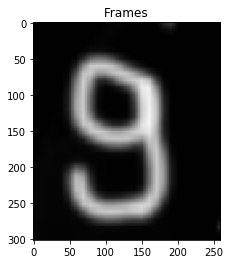

In [16]:
frame =  cv.imread("Test/nine.png")
im    =  cv.imread("Test/nine.png",0)
im = cv.resize(im,(28,28))

a = np.asarray(im)
a = a/255.0
a = np.reshape(a,(1,28,28))

#print('******************************************')

x = model.predict(a)
print('             ',np.argmax(x[0]))

plt.imshow(frame)
plt.title('Frames')
plt.show()